# Data 515A Software Engineering - Homework 1
Will Wright  
2020-04-12

#### Import Packages

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

**1. Read the CSV file into a pandas dataframe. (1 pt)**  

For reference, the data is coming from this [seattle.gov](https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k) site which states:  

The Fremont Bridge Bicycle Counter began operation in October 2012 and records the number of bikes that cross the bridge using the pedestrian/bicycle pathways. Inductive loops on the east and west pathways count the passing of bicycles regardless of travel direction. The data consists of a date/time field: Date, east pathway count field: Fremont Bridge NB, and west pathway count field: Fremont Bridge SB. The count fields represent the total bicycles detected during the specified one hour period. Direction of travel is not specified, but in general most traffic in the Fremont Bridge NB field is travelling northbound and most traffic in the Fremont Bridge SB field is travelling southbound.

In [2]:
bike_counts = pd.read_csv("../data/Fremont_Bridge_Bicycle_Counter.csv")

#### Quick EDA + Cleaning

In [3]:
# preview of the data
bike_counts.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


In [4]:
# those headers with the spaces won't do so converting to best-practices:
bike_counts.columns = bike_counts.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [5]:
# revised headers
bike_counts.columns

Index(['date', 'fremont_bridge_total', 'fremont_bridge_east_sidewalk',
       'fremont_bridge_west_sidewalk'],
      dtype='object')

In [6]:
# sense of size for the data
bike_counts.shape

(65688, 4)

In [7]:
# quick stats
bike_counts.describe()

,fremont_bridge_total,fremont_bridge_east_sidewalk,fremont_bridge_west_sidewalk
count,65678.000000,65678.000000,65678.000000
mean,113.397378,51.748302,61.649076
std,144.853108,66.803517,90.358214
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


In [8]:
# understand daterange
print(min(bike_counts.date))
print(max(bike_counts.date))

01/01/2013 01:00:00 AM
12/31/2019 12:00:00 PM


In [9]:
# understand data types
bike_counts.dtypes

date                             object
fremont_bridge_total            float64
fremont_bridge_east_sidewalk    float64
fremont_bridge_west_sidewalk    float64
dtype: object

'date' needs to be what it actually is: a datetime:

In [10]:
bike_counts['date'] = pd.to_datetime(bike_counts['date'])

**2. Add columns to the dataframe containing: ( 3 pt)**
 * The total (East + West) bicycle count
 * The hour of the day
 * The year

In [11]:
bike_counts['total_bikes'] = bike_counts.fremont_bridge_east_sidewalk + bike_counts.fremont_bridge_west_sidewalk

In [12]:
bike_counts['hour'] = bike_counts['date'].dt.hour

In [13]:
bike_counts['year'] = bike_counts['date'].dt.year

In [14]:
# demonstrate the new columns
bike_counts.head()

,date,fremont_bridge_total,fremont_bridge_east_sidewalk,fremont_bridge_west_sidewalk,total_bikes,hour,year
0,2012-10-03 00:00:00,13.0,4.0,9.0,13.0,0,2012
1,2012-10-03 01:00:00,10.0,4.0,6.0,10.0,1,2012
2,2012-10-03 02:00:00,2.0,1.0,1.0,2.0,2,2012
3,2012-10-03 03:00:00,5.0,2.0,3.0,5.0,3,2012
4,2012-10-03 04:00:00,7.0,6.0,1.0,7.0,4,2012


**3. Create a dataframe with the subset of data from the year 2016 (1 pt)**

In [15]:
bike_counts_2016 = bike_counts[bike_counts.year==2016]

In [16]:
# demonstrate successful subsetting by showing that 2016 is the only value for the year column
bike_counts_2016.year.value_counts()

2016    8784
Name: year, dtype: int64

**4. Use pandas + matplotlib to plot the counts by hour. (i.e. hour of the day on the x-axis, total daily counts on the y-axis) (1 pt)**

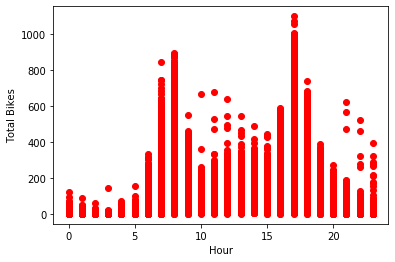

In [32]:
plt.plot(bike_counts.hour, bike_counts.total_bikes, "ro")
plt.xlabel('Hour')
plt.ylabel('Total Bikes')
plt.show()

While the above is... fine, we're losing a lot of information about the distributions of total bikes per hour.  It looks like Seaborn does this, but so there is a pandas method '.boxplot' which accepts a 'by' grouping argument:

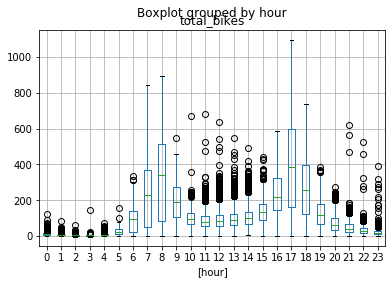

In [33]:
bike_counts[['total_bikes','hour']].boxplot(by = 'hour')

**5. Use pandas to determine what is (on average) the busiest hour of the day (1 pt)**

If we interpret 'busiest hour' as the hour in which we should expect the most traffic, then we should consider the maximum median volume of bikes per hour as the answer.  This approach mitigates possible bias due to outliers. Though, based on the above chart, it's pretty clear that 5pm is the obvious choice regardless of outliers.

In [40]:
hourly_bike_medians = bike_counts[['total_bikes','hour']].groupby('hour').median()

In [41]:
hourly_bike_medians

,total_bikes
hour,
0,10.0
1,5.0
2,3.0
3,3.0
4,6.0
5,25.0
6,93.0
7,231.0
8,343.0


In [50]:
hourly_bike_medians.index[hourly_bike_medians]

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='hour')